


Partimos del dataset de seguro de automóviles que podemos descargar de:

https://archive.ics.uci.edu/ml/datasets/Automobile

Vamos a cargar el dataframe de seguros de coches:

In [1]:
autos<-read.csv("./data//imports-85.data", col.names = c("risk", "normalized_losses", 
                                                         "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"))

In [2]:
head(autos)

,risk,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,⋯,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [3]:
str(autos)

'data.frame':	204 obs. of  26 variables:
 $ risk             : int  3 1 2 2 2 1 1 1 0 2 ...
 $ normalized_losses: chr  "?" "?" "164" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel_type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num_doors        : chr  "two" "two" "four" "four" ...
 $ body_style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive_wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine_location  : chr  "front" "front" "front" "front" ...
 $ wheel_base       : num  88.6 94.5 99.8 99.4 99.8 ...
 $ length           : num  169 171 177 177 177 ...
 $ width            : num  64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 ...
 $ height           : num  48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 54.3 ...
 $ curb_weight      : int  2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 ...
 $ engine_type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num_cylinders    :

In [7]:
columnas <- c("risk" ,"horsepower", "length","body_style")
autos_lite <- autos[,columnas]

In [8]:
summary(autos_lite)

      risk          horsepower            length       body_style       
 Min.   :-2.0000   Length:204         Min.   :141.1   Length:204        
 1st Qu.: 0.0000   Class :character   1st Qu.:166.3   Class :character  
 Median : 1.0000   Mode  :character   Median :173.2   Mode  :character  
 Mean   : 0.8235                      Mean   :174.1                     
 3rd Qu.: 2.0000                      3rd Qu.:183.2                     
 Max.   : 3.0000                      Max.   :208.1                     

In [12]:
autos_lite[autos_lite$horsepower=='?',]

,risk,horsepower,length,body_style
,<int>,<chr>,<dbl>,<chr>
130,0,?,181.5,wagon
131,2,?,176.8,hatchback


In [14]:
autos_lite[autos_lite$horsepower=='?','horsepower'] <- NA

#### Consulta de filas

In [17]:
which(autos_lite$horsepower=='100')

[1]  42 188

In [18]:
autos_lite[c(42,188),]

,risk,horsepower,length,body_style
,<int>,<chr>,<dbl>,<chr>
42,1,100,169.1,sedan
188,2,100,171.7,sedan


Pasamos la columna horsepower de caracter a número:

In [31]:
autos_lite$horsepower <- as.numeric(autos_lite$horsepower)

In [32]:
summary(autos_lite)

      risk           horsepower        length       body_style       
 Min.   :-2.0000   Min.   : 48.0   Min.   :141.1   Length:204        
 1st Qu.: 0.0000   1st Qu.: 70.0   1st Qu.:166.3   Class :character  
 Median : 1.0000   Median : 95.0   Median :173.2   Mode  :character  
 Mean   : 0.8235   Mean   :104.2   Mean   :174.1                     
 3rd Qu.: 2.0000   3rd Qu.:116.0   3rd Qu.:183.2                     
 Max.   : 3.0000   Max.   :288.0   Max.   :208.1                     
                   NA's   :2                                         

In [33]:
unique(autos_lite$body_style)

[1] "convertible" "hatchback"   "sedan"       "wagon"       "hardtop"

In [35]:
tbl<-table(autos_lite$body_style)
tbl


convertible     hardtop   hatchback       sedan       wagon 
          5           8          70          96          25 

In [36]:
names(tbl)

[1] "convertible" "hardtop"     "hatchback"   "sedan"       "wagon"

In [37]:
tbl[2]

hardtop 
      8

In [38]:
autos_lite$body_style <- as.factor(autos_lite$body_style)

In [39]:
summary(autos_lite)

      risk           horsepower        length            body_style
 Min.   :-2.0000   Min.   : 48.0   Min.   :141.1   convertible: 5  
 1st Qu.: 0.0000   1st Qu.: 70.0   1st Qu.:166.3   hardtop    : 8  
 Median : 1.0000   Median : 95.0   Median :173.2   hatchback  :70  
 Mean   : 0.8235   Mean   :104.2   Mean   :174.1   sedan      :96  
 3rd Qu.: 2.0000   3rd Qu.:116.0   3rd Qu.:183.2   wagon      :25  
 Max.   : 3.0000   Max.   :288.0   Max.   :208.1                   
                   NA's   :2                                       

### Calculamos estimadores:

#### Media

In [43]:
paste("La media de caballos de vapor de todos los coches es:",
      mean(autos_lite$horsepower, na.rm=T))

[1] "La media de caballos de vapor de todos los coches es: 104.222772277228"

In [45]:
mean(na.omit(autos_lite$horsepower))

[1] 104.2228

In [47]:
paste("La media de caballos de vapor de todos los coches es:",
      round(mean(autos_lite$horsepower, na.rm=T),2))

[1] "La media de caballos de vapor de todos los coches es: 104.22"

In [50]:
autos_hatchback <- autos_lite[ autos_lite$body_style=='hatchback', ]

In [51]:
which(autos_lite$body_style=='hatchback')

[1]   2   9  18  19  21  22  23  24  29  30  31  32  33  34  37  38  46  50  51
[20]  52  55  56  57  58  59  61  64  75  76  77  78  79  80  81  82  83  84  95
[39]  99 104 105 106 118 119 120 124 125 129 131 132 134 136 138 139 140 150 151
[58] 152 157 159 161 164 166 169 171 175 177 178 179 190

In [52]:
# Esta línea con el which es ligeramente más eficiente:
autos_hatchback <- autos_lite[ which(autos_lite$body_style=='hatchback'), ]

In [55]:
dim(autos_hatchback)
nrow(autos_hatchback)
ncol(autos_hatchback)

[1] 70  4

[1] 70

[1] 4

In [59]:
paste("La media de CV de los coches tipo hatchback es:",
      mean(autos_hatchback$horsepower, na.rm=TRUE))

[1] "La media de CV de los coches tipo hatchback es: 101.333333333333"

In [65]:
paste("La media de CV de los coches tipo hardtop es:",
      mean(autos_lite$horsepower[autos_lite$body_style=='hardtop'], na.rm=TRUE))

[1] "La media de CV de los coches tipo hardtop es: 142.25"

#### Mediana

In [67]:
paste("La mediana de caballos de vapor de todos los coches es:",
      median(autos_lite$horsepower, na.rm=T))

paste("La mediana de CV de los coches tipo hatchback es:",
      median(autos_hatchback$horsepower, na.rm=TRUE))

[1] "La mediana de caballos de vapor de todos los coches es: 95"

[1] "La mediana de CV de los coches tipo hatchback es: 88"

#### Boxplot

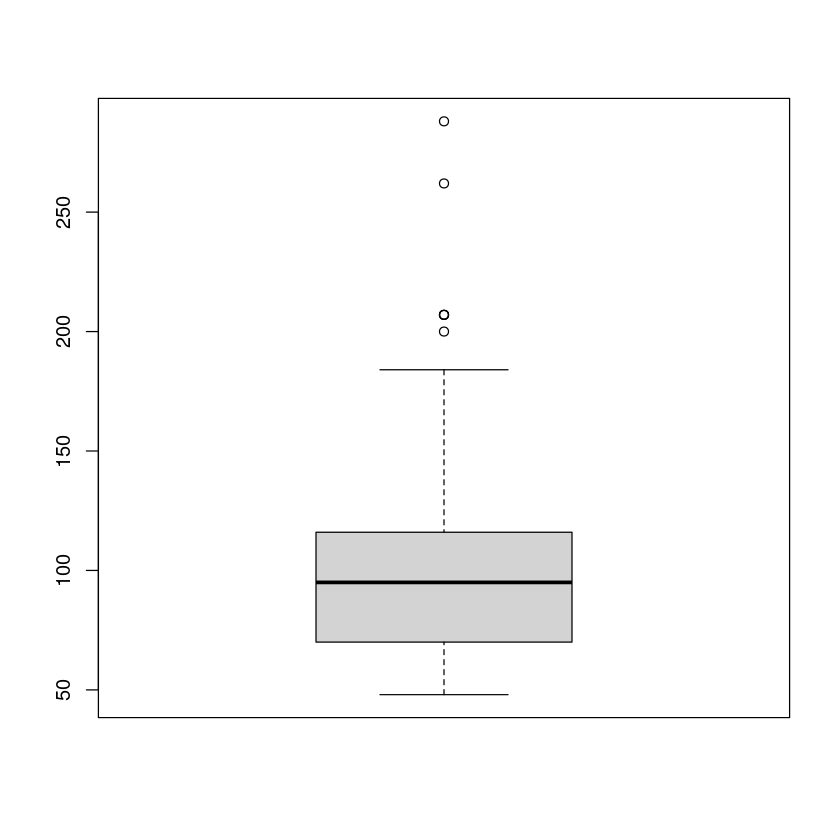

In [68]:
boxplot(autos_lite$horsepower)

In [70]:
min(autos_lite$horsepower, na.rm=T)

[1] 48

In [72]:
max(autos_lite$horsepower, na.rm=T)

[1] 288

El coche con más CV es:

In [75]:
autos_lite[which.max(autos_lite$horsepower),]

,risk,horsepower,length,body_style
,<int>,<dbl>,<dbl>,<fct>
129,1,288,175.7,hatchback


In [77]:
quantile(autos_lite$horsepower, c(0.1,0.25,0.50,0.75,0.9), na.rm=T)

10% 25% 50% 75% 90% 
 68  70  95 116 160

Moda:

In [84]:
tbl <- table(autos_lite$body_style)
tbl


convertible     hardtop   hatchback       sedan       wagon 
          5           8          70          96          25 

In [88]:
names(tbl[which.max(tbl)])

[1] "sedan"

### Ejercicio caramelos

In [89]:
caramelos <- c(25,65,50,53,48,60,52)

In [90]:
mean(caramelos)

[1] 50.42857

In [91]:
median(caramelos)

[1] 52

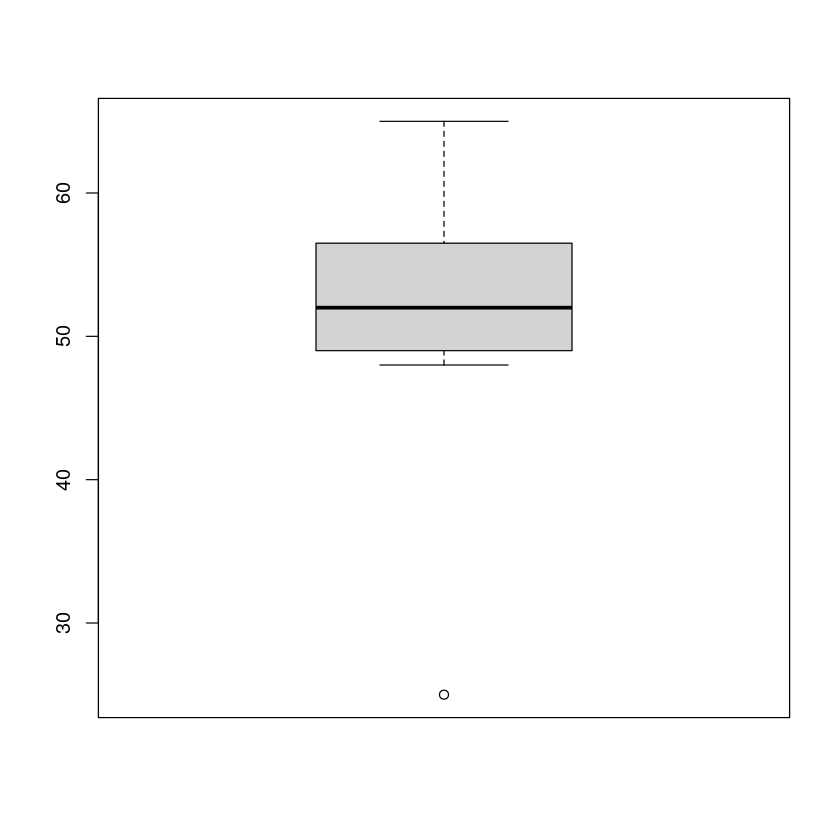

In [92]:
boxplot(caramelos)

In [94]:
caramelos > 45

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [95]:
caramelos_limpio <- caramelos[caramelos > 45]

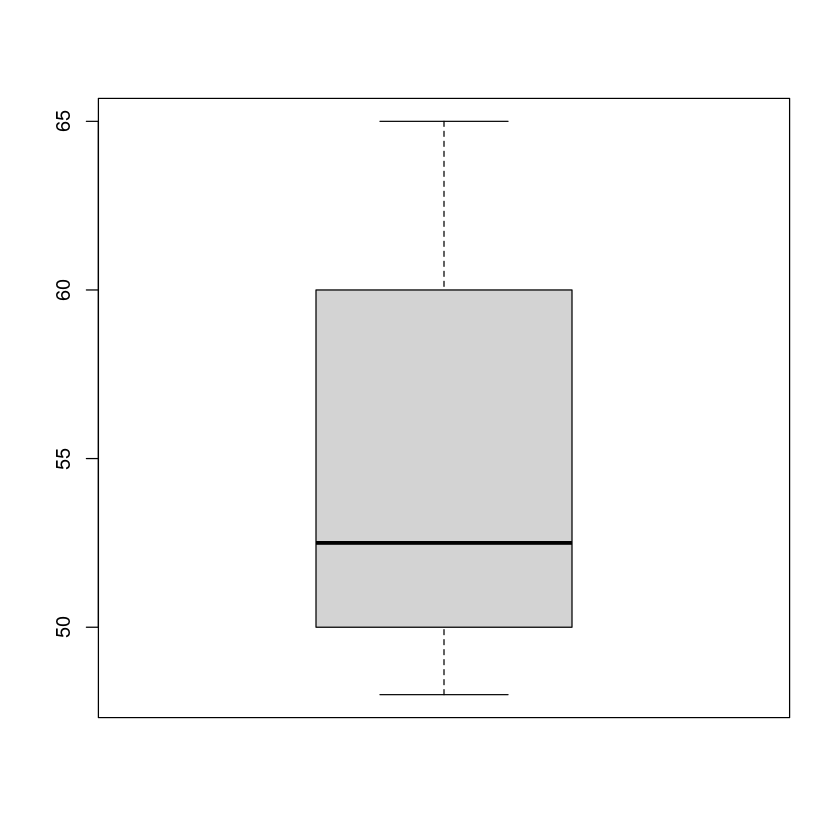

In [96]:
boxplot(caramelos_limpio)

In [97]:
mean(caramelos_limpio)

[1] 54.66667